Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Dataset

In [4]:
df = pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# To display stats about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# To display the no. of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Preprocessing the Dataset

In [9]:
# Check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis

In [11]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: >

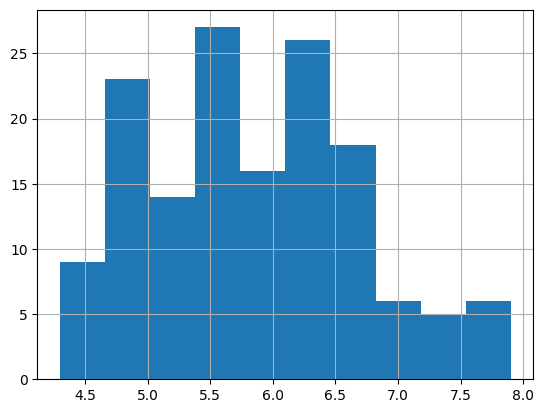

In [12]:
df['sepal_length'].hist()

<Axes: >

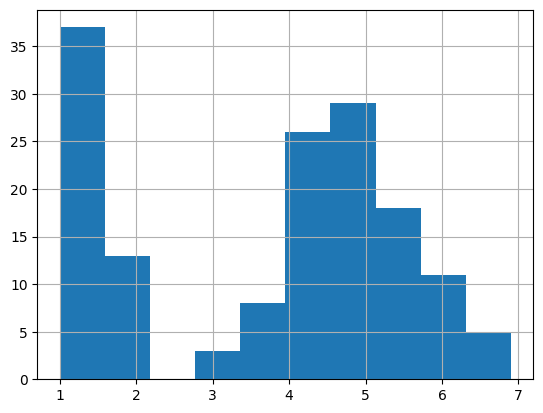

In [13]:
df['petal_length'].hist()

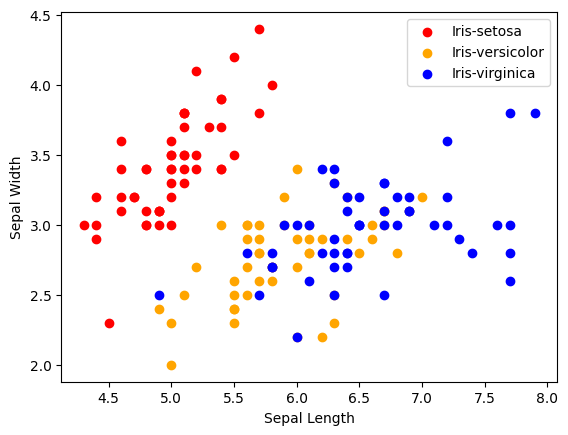

In [15]:
# scatterplot
colour =['red','orange','blue']
species =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c = colour[i], label = species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

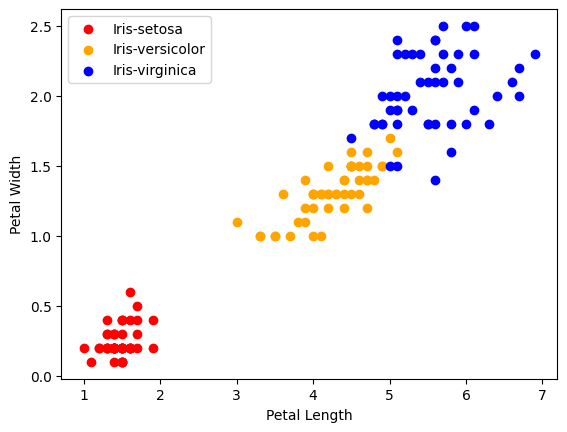

In [16]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c = colour[i], label = species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

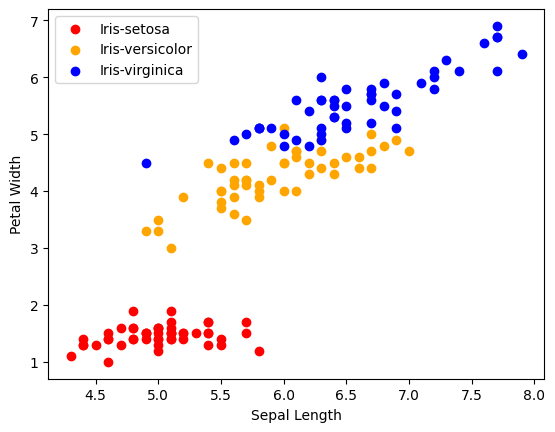

In [17]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c = colour[i], label = species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Width")
  plt.legend()

Coorelation Matrix

In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-22-44d93d85ef53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

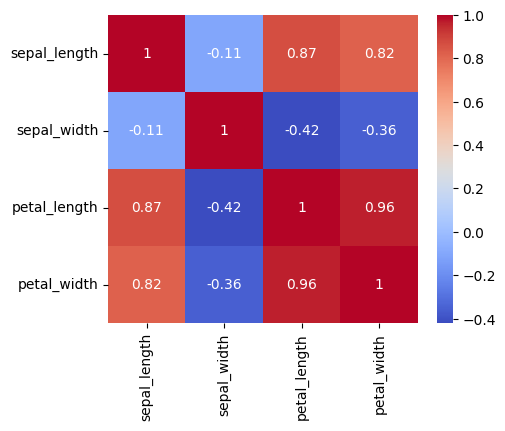

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap= 'coolwarm')

Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('/content/IRIS.csv')
# train=70, test=30
X = df.drop(columns=['species'])
Y = df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [7]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
#Print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [10]:
# k=neartest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [12]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333
